# ANALYSING LABOUR PROBLEM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model, metrics
import statsmodels.api as sm

In [2]:
df = pd.read_csv("ML_Case1.csv")

In [3]:
df.head()

Age          Eduacation      Race         Hisp MaritalStatus  Nodeg  \
0   45  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
1   21        Intermediate  NotBlack  NotHispanic    NotMarried      0   
2   38          HighSchool  NotBlack  NotHispanic       Married      0   
3   48  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
4   18  LessThanHighSchool  NotBlack  NotHispanic       Married      1   

   Earnings_1974  Earnings_1975  Earnings_1978  
0      21516.670      25243.550      25564.670  
1       3175.971       5852.565      13496.080  
2      23039.020      25130.760      25564.670  
3      24994.370      25243.550      25564.670  
4       1669.295      10727.610       9860.869

In [4]:
df.tail()

Age          Eduacation      Race         Hisp MaritalStatus  Nodeg  \
15987   22          HighSchool     black  NotHispanic    NotMarried      0   
15988   20          HighSchool     black  NotHispanic       Married      0   
15989   37          HighSchool  NotBlack  NotHispanic    NotMarried      0   
15990   47  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
15991   40  LessThanHighSchool  NotBlack  NotHispanic    NotMarried      1   

       Earnings_1974  Earnings_1975  Earnings_1978  
15987       3975.352       6801.435       2757.438  
15988       1445.939      11832.240       6895.072  
15989       1733.951       1559.371       4221.865  
15990      16914.350      11384.660      13671.930  
15991      13628.660      13144.550       7979.724

In [5]:
df.shape

(15992, 9)

In [6]:
df.isnull().sum()

Age              0
Eduacation       0
Race             0
Hisp             0
MaritalStatus    0
Nodeg            0
Earnings_1974    0
Earnings_1975    0
Earnings_1978    0
dtype: int64

In [7]:
dupli = df[df.duplicated()]


In [8]:
dupli

Age          Eduacation      Race         Hisp MaritalStatus  Nodeg  \
60      33          HighSchool  NotBlack  NotHispanic       Married      0   
250     54          HighSchool  NotBlack  NotHispanic       Married      0   
252     55        Intermediate  NotBlack  NotHispanic       Married      0   
298     44          HighSchool  NotBlack  NotHispanic       Married      0   
306     32        Intermediate  NotBlack  NotHispanic       Married      0   
...    ...                 ...       ...          ...           ...    ...   
15946   31          HighSchool  NotBlack  NotHispanic       Married      0   
15948   28        Intermediate  NotBlack  NotHispanic       Married      0   
15949   39  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
15984   48  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
15986   35          HighSchool  NotBlack  NotHispanic       Married      0   

       Earnings_1974  Earnings_1975  Earnings_1978  
60          25862.32       25243.55       25564.67  
250             0.00           0.00           0.00  
252         25862.32       25243.55       25564.67  
298         25862.32       25243.55       25564.67  
306         25862.32       25243.55       25564.67  
...              ...            ...            ...  
15946       25862.32       25243.55           0.00  
15948       25862.32       25243.55       25564.67  
15949       25862.32       25243.55       25564.67  
15984       25862.32       25243.55       25564.67  
15986           0.00           0.00           0.00  

[2002 rows x 9 columns]

In [9]:
df.describe()

Age         Nodeg  Earnings_1974  Earnings_1975  Earnings_1978
count  15992.000000  15992.000000   15992.000000   15992.000000   15992.000000
mean      33.225238      0.295835   14016.800304   13650.803376   14846.659673
std       11.045216      0.456432    9569.795893    9270.403225    9647.391524
min       16.000000      0.000000       0.000000       0.000000       0.000000
25%       24.000000      0.000000    4403.452250    4398.823000    5669.298000
50%       31.000000      0.000000   15123.580000   14557.110000   16421.975000
75%       42.000000      1.000000   23584.180000   22923.737500   25564.670000
max       55.000000      1.000000   25862.320000   25243.550000   25564.670000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [11]:
## Inline Plot def
%matplotlib inline

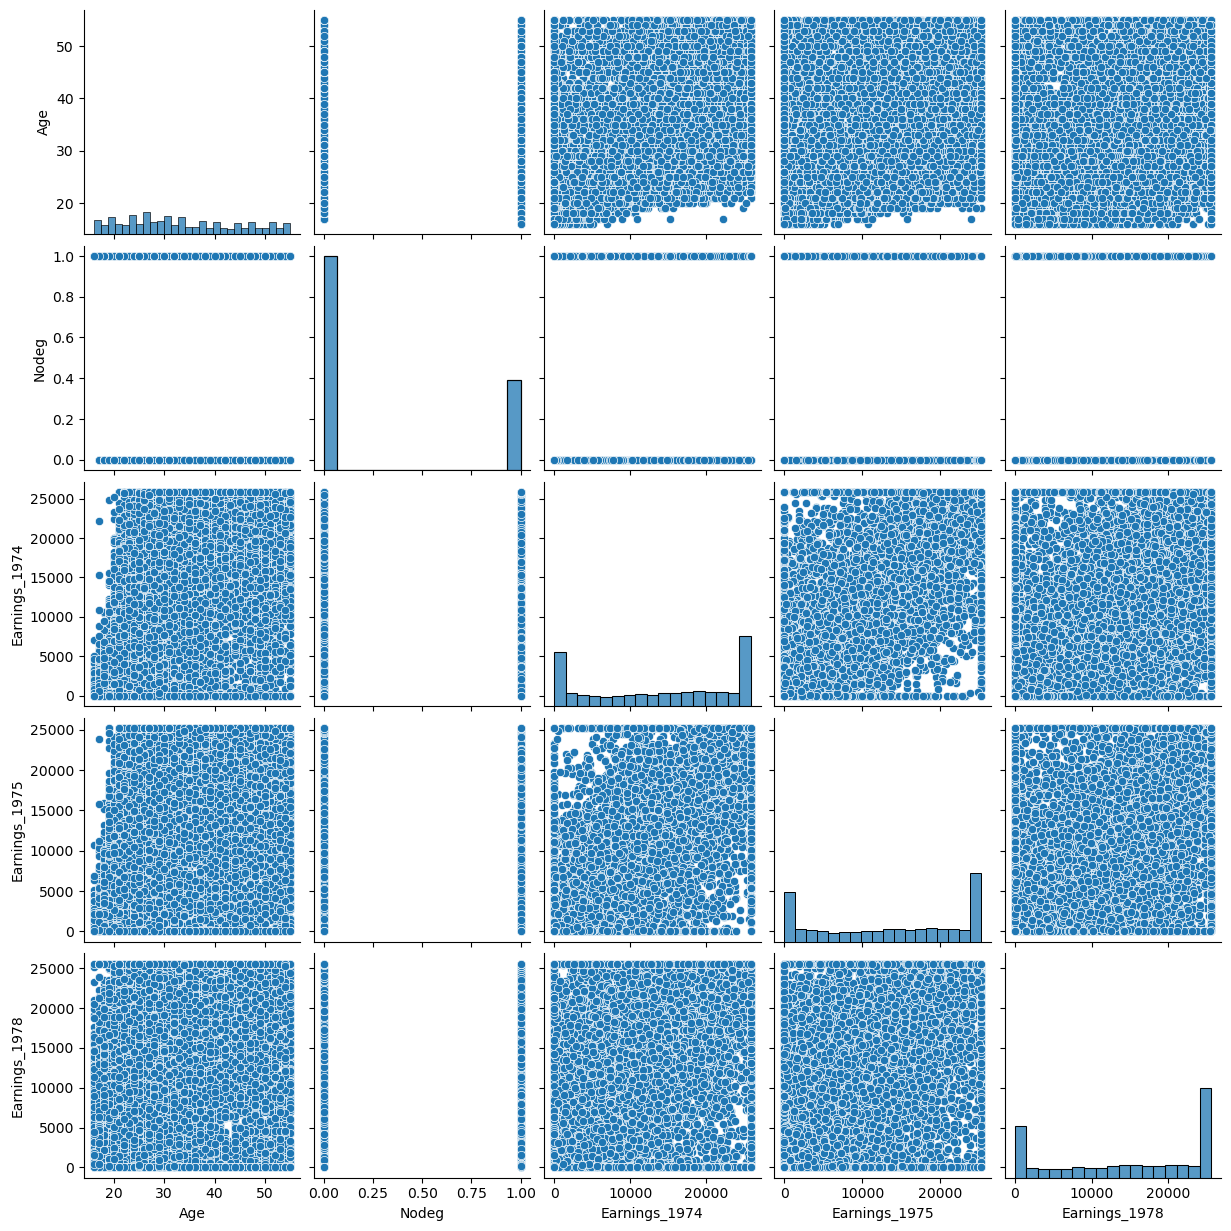

In [12]:
sns.pairplot(df)

# Let us look at scatter plot for specific variables since we want to see if we can predict 1978 earnings

In [13]:
df.columns

Index(['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg',
       'Earnings_1974', 'Earnings_1975', 'Earnings_1978'],
      dtype='object')

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


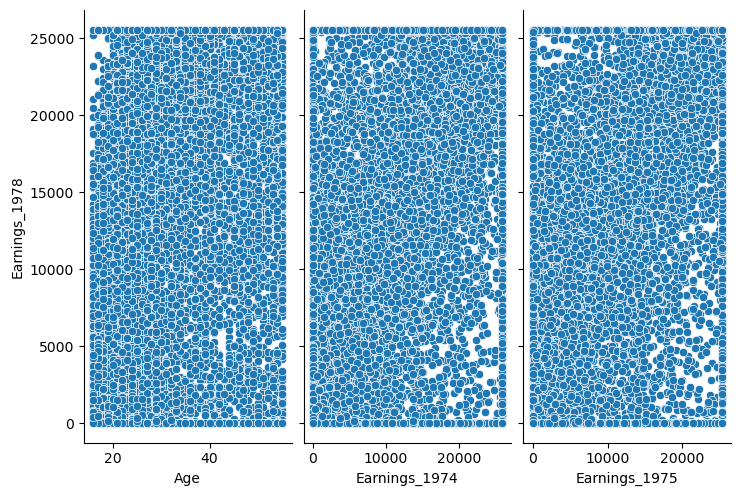

In [14]:
sns.pairplot(df,x_vars =['Age','Earnings_1974', 'Earnings_1975'], y_vars='Earnings_1978', size = 5,aspect = 0.5, kind= 'scatter')

As we can see there is something earnings_1974,earnings_1975

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


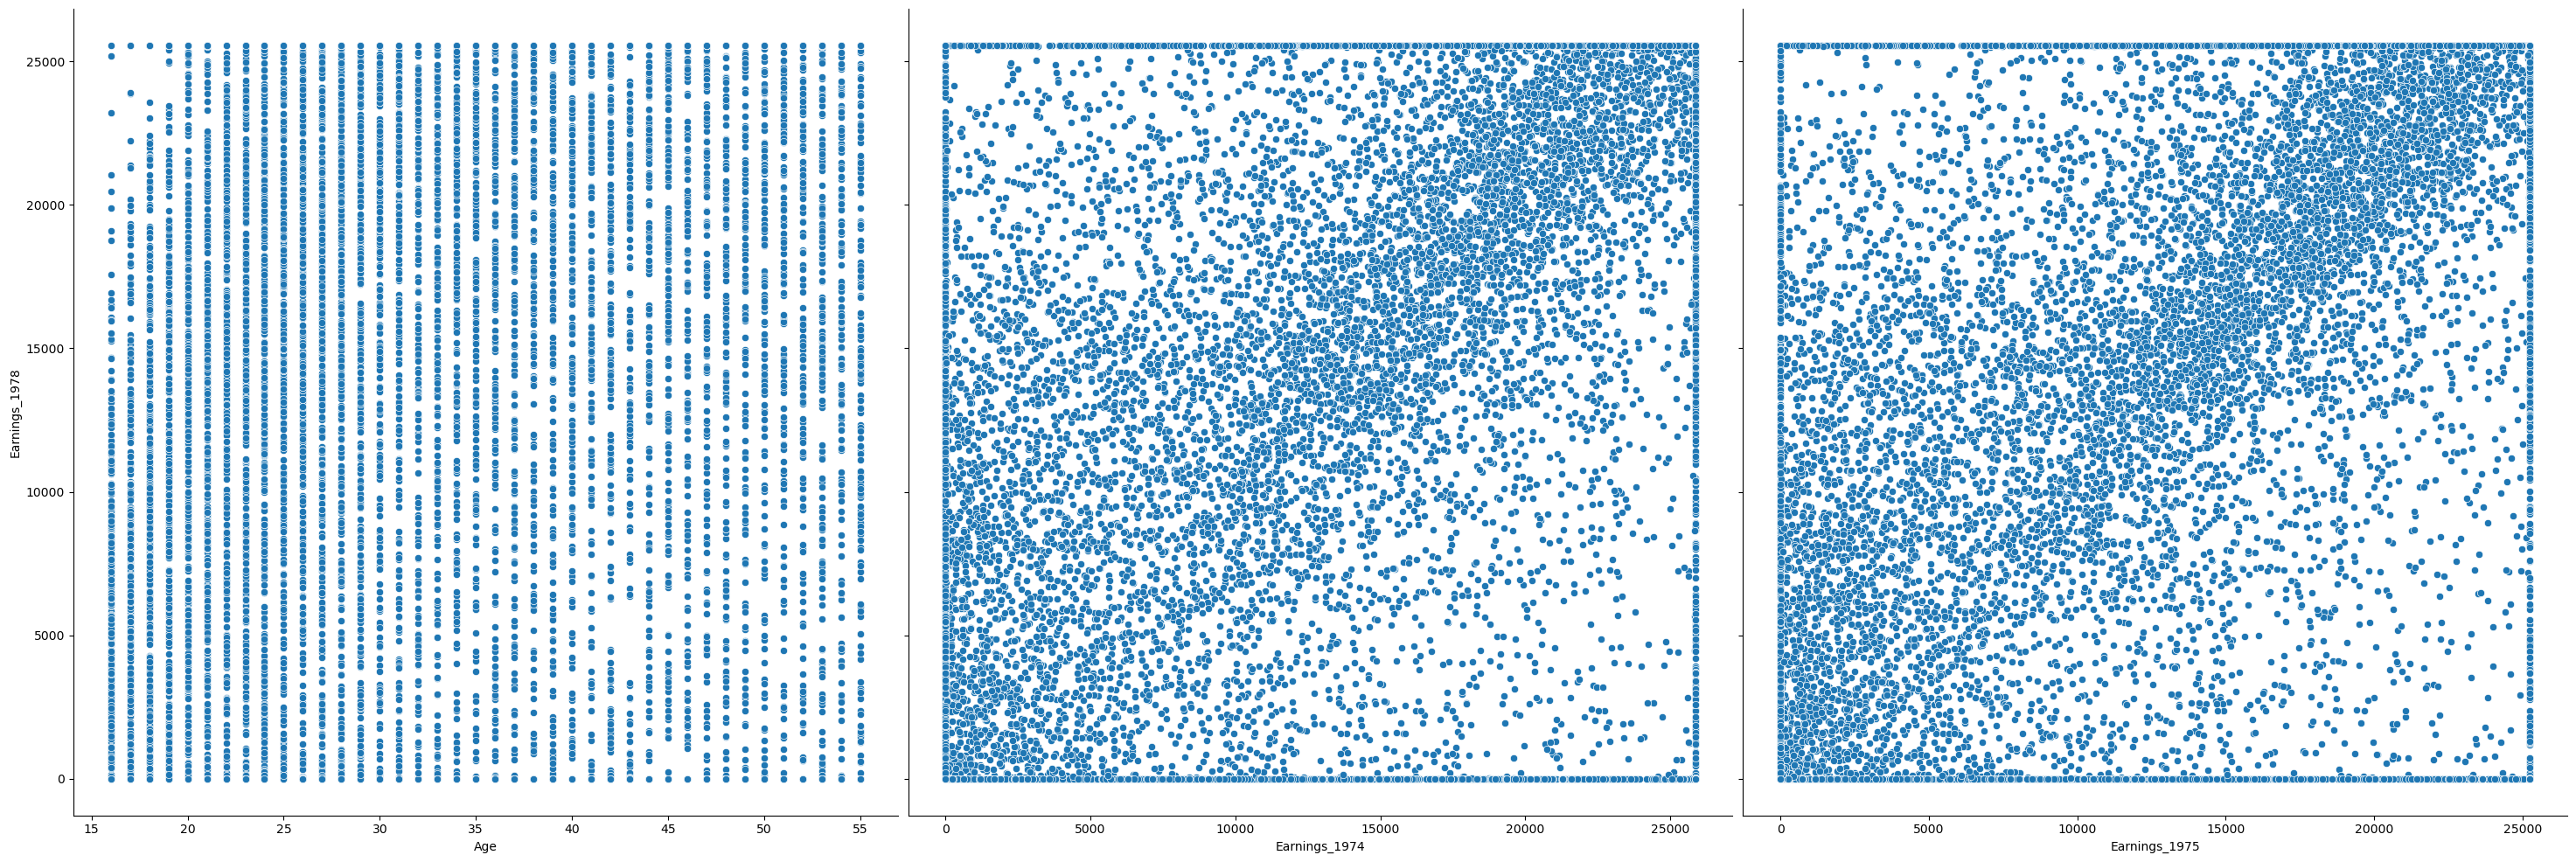

In [15]:
# 
sns.pairplot(df,x_vars =['Age','Earnings_1974', 'Earnings_1975'], y_vars='Earnings_1978', size = 10,aspect = 1.0, kind= 'scatter')

<Axes: >

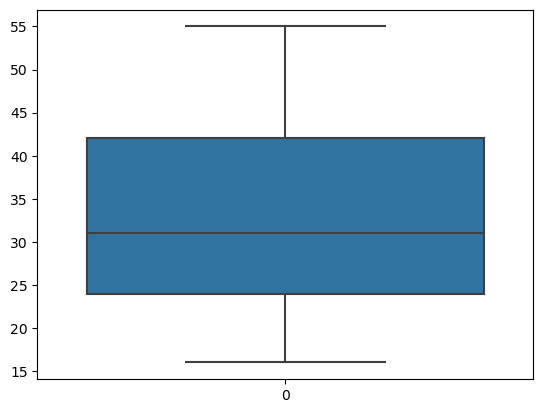

In [16]:
# Box Plot
sns.boxplot(data=df['Age'])

<Axes: >

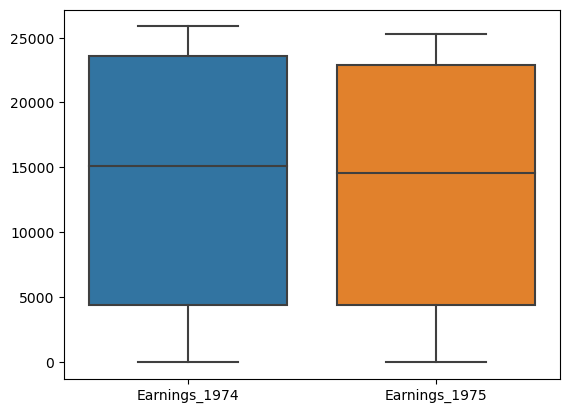

In [17]:
sns.boxplot(data=df[['Earnings_1974', 'Earnings_1975']], orient = "v") # v = vertical

In [18]:
df.columns

Index(['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg',
       'Earnings_1974', 'Earnings_1975', 'Earnings_1978'],
      dtype='object')

<Axes: xlabel='Race', ylabel='Earnings_1978'>

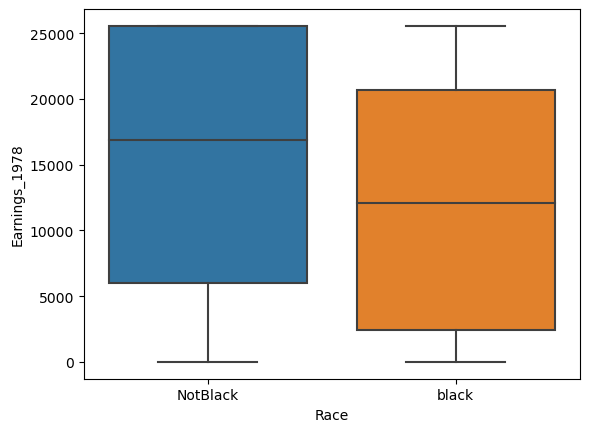

In [19]:
sns.boxplot(x=df[ 'Race'],y=df[ 'Earnings_1978'])

<Axes: xlabel='Hisp', ylabel='Earnings_1978'>

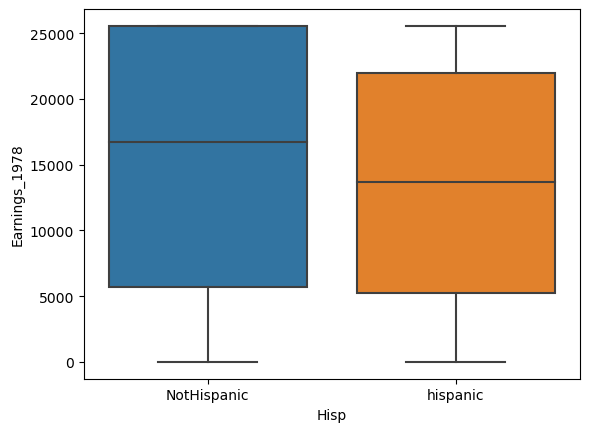

In [20]:
sns.boxplot(x=df['Hisp'],y=df[ 'Earnings_1978'])

<Axes: xlabel='MaritalStatus', ylabel='Earnings_1978'>

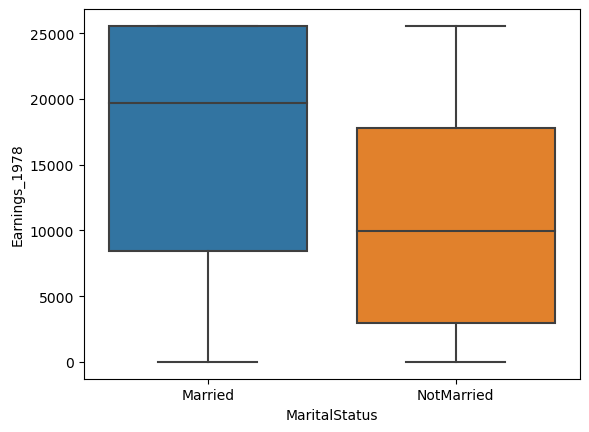

In [21]:
sns.boxplot(x=df['MaritalStatus'],y=df[ 'Earnings_1978'])

<Axes: xlabel='Nodeg', ylabel='Earnings_1978'>

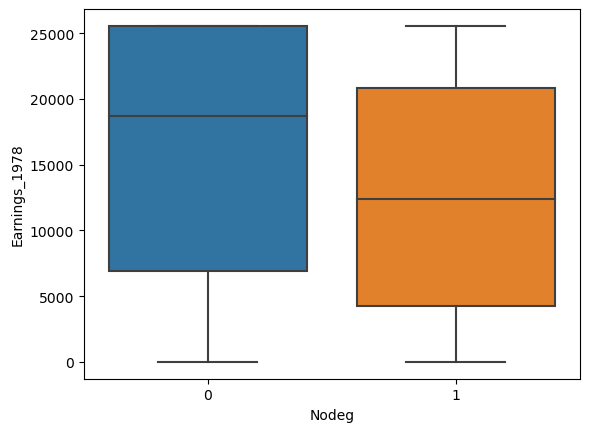

In [22]:
sns.boxplot(x=df['Nodeg'],y=df[ 'Earnings_1978'])

<Axes: xlabel='MaritalStatus', ylabel='Earnings_1978'>

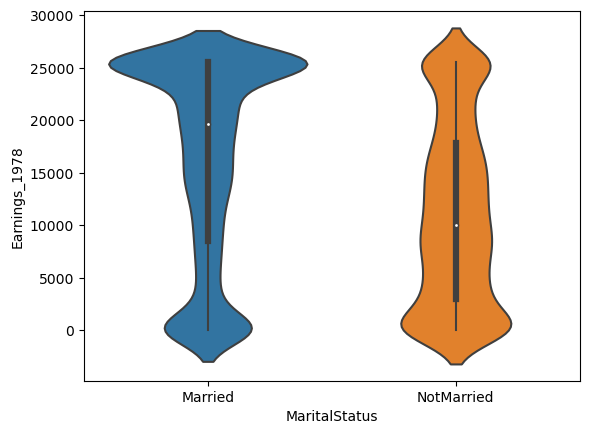

In [23]:
## Simply Confirm Polarity as seen in box plot
sns.violinplot(x=df['MaritalStatus'],y=df[ 'Earnings_1978'])

<Axes: xlabel='Race', ylabel='Earnings_1978'>

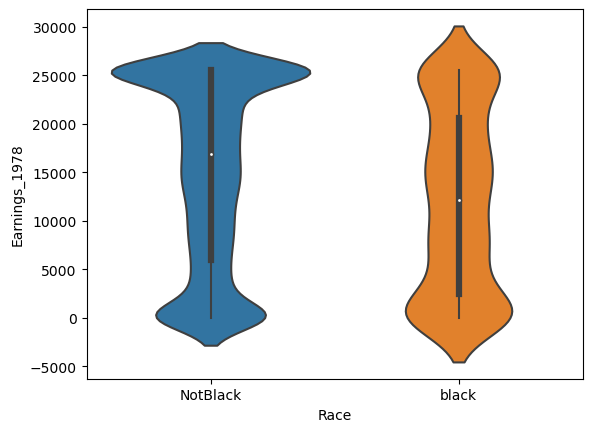

In [24]:
sns.violinplot(x=df['Race'],y=df[ 'Earnings_1978'])

<Axes: xlabel='Hisp', ylabel='Earnings_1978'>

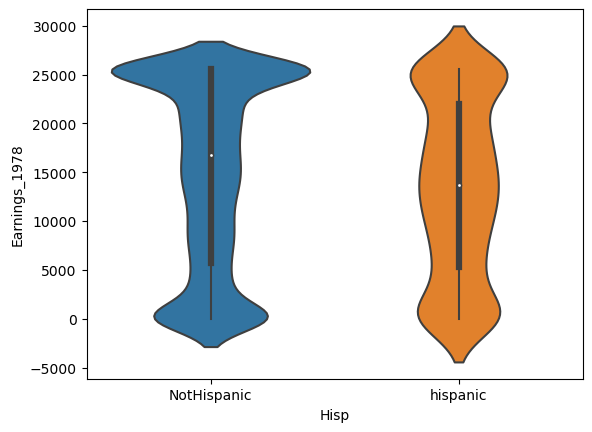

In [25]:
sns.violinplot(x=df['Hisp'],y=df[ 'Earnings_1978'])

<Axes: xlabel='Nodeg', ylabel='Earnings_1978'>

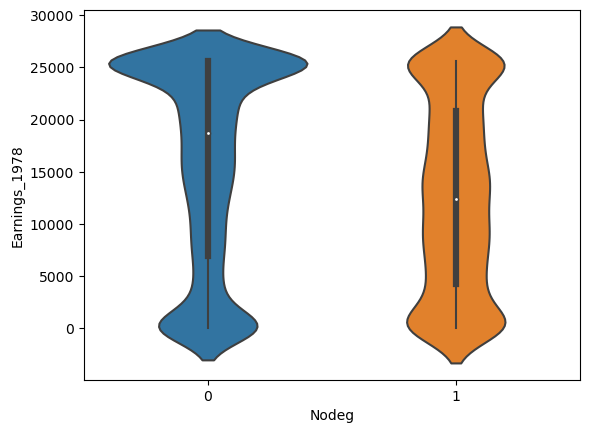

In [26]:
sns.violinplot(x=df['Nodeg'],y=df[ 'Earnings_1978'])

<Axes: xlabel='Eduacation', ylabel='Earnings_1978'>

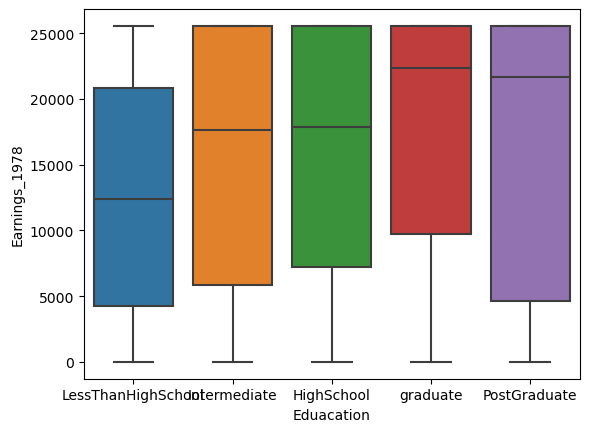

In [27]:
sns.boxplot(x=df['Eduacation'],y=df[ 'Earnings_1978'])

<Axes: xlabel='Eduacation', ylabel='Earnings_1978'>

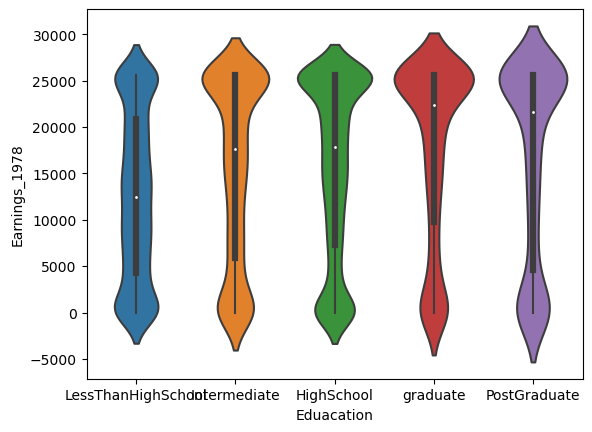

In [28]:
sns.violinplot(x=df['Eduacation'],y=df[ 'Earnings_1978'])

In [13]:
## WE need continuous variables for regression 
## so we need to split the dataset as numeric and categorical
df_num = df[['Age','Nodeg','Earnings_1974', 'Earnings_1975', 'Earnings_1978']]

In [14]:
df_num.head()

Age  Nodeg  Earnings_1974  Earnings_1975  Earnings_1978
0   45      1      21516.670      25243.550      25564.670
1   21      0       3175.971       5852.565      13496.080
2   38      0      23039.020      25130.760      25564.670
3   48      1      24994.370      25243.550      25564.670
4   18      1       1669.295      10727.610       9860.869

In [15]:
## Now Change Categorical variables to continuous variables using the DUMMY VARIABLE
df_dummy = pd.get_dummies(df[['Eduacation', 'Race', 'Hisp', 'MaritalStatus']])

In [16]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Eduacation_HighSchool          15992 non-null  uint8
 1   Eduacation_Intermediate        15992 non-null  uint8
 2   Eduacation_LessThanHighSchool  15992 non-null  uint8
 3   Eduacation_PostGraduate        15992 non-null  uint8
 4   Eduacation_graduate            15992 non-null  uint8
 5   Race_NotBlack                  15992 non-null  uint8
 6   Race_black                     15992 non-null  uint8
 7   Hisp_NotHispanic               15992 non-null  uint8
 8   Hisp_hispanic                  15992 non-null  uint8
 9   MaritalStatus_Married          15992 non-null  uint8
 10  MaritalStatus_NotMarried       15992 non-null  uint8
dtypes: uint8(11)
memory usage: 171.9 KB


In [17]:
df_dummy.head(5)

Eduacation_HighSchool  Eduacation_Intermediate  \
0                      0                        0   
1                      0                        1   
2                      1                        0   
3                      0                        0   
4                      0                        0   

   Eduacation_LessThanHighSchool  Eduacation_PostGraduate  \
0                              1                        0   
1                              0                        0   
2                              0                        0   
3                              1                        0   
4                              1                        0   

   Eduacation_graduate  Race_NotBlack  Race_black  Hisp_NotHispanic  \
0                    0              1           0                 1   
1                    0              1           0                 1   
2                    0              1           0                 1   
3                    0              1           0                 1   
4                    0              1           0                 1   

   Hisp_hispanic  MaritalStatus_Married  MaritalStatus_NotMarried  
0              0                      1                         0  
1              0                      0                         1  
2              0                      1                         0  
3              0                      1                         0  
4              0                      1                         0

# NOW JOIN THE DATAFRAME COLUMN-WISE

In [18]:
df_final=pd.concat([df_num, df_dummy], axis = 1) # axis =1 (JOIN THE DATAFRAME COLUMN-WISE)

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            15992 non-null  int64  
 1   Nodeg                          15992 non-null  int64  
 2   Earnings_1974                  15992 non-null  float64
 3   Earnings_1975                  15992 non-null  float64
 4   Earnings_1978                  15992 non-null  float64
 5   Eduacation_HighSchool          15992 non-null  uint8  
 6   Eduacation_Intermediate        15992 non-null  uint8  
 7   Eduacation_LessThanHighSchool  15992 non-null  uint8  
 8   Eduacation_PostGraduate        15992 non-null  uint8  
 9   Eduacation_graduate            15992 non-null  uint8  
 10  Race_NotBlack                  15992 non-null  uint8  
 11  Race_black                     15992 non-null  uint8  
 12  Hisp_NotHispanic               15992 non-null 

In [20]:
df_final.head()

Age  Nodeg  Earnings_1974  Earnings_1975  Earnings_1978  \
0   45      1      21516.670      25243.550      25564.670   
1   21      0       3175.971       5852.565      13496.080   
2   38      0      23039.020      25130.760      25564.670   
3   48      1      24994.370      25243.550      25564.670   
4   18      1       1669.295      10727.610       9860.869   

   Eduacation_HighSchool  Eduacation_Intermediate  \
0                      0                        0   
1                      0                        1   
2                      1                        0   
3                      0                        0   
4                      0                        0   

   Eduacation_LessThanHighSchool  Eduacation_PostGraduate  \
0                              1                        0   
1                              0                        0   
2                              0                        0   
3                              1                        0   
4                              1                        0   

   Eduacation_graduate  Race_NotBlack  Race_black  Hisp_NotHispanic  \
0                    0              1           0                 1   
1                    0              1           0                 1   
2                    0              1           0                 1   
3                    0              1           0                 1   
4                    0              1           0                 1   

   Hisp_hispanic  MaritalStatus_Married  MaritalStatus_NotMarried  
0              0                      1                         0  
1              0                      0                         1  
2              0                      1                         0  
3              0                      1                         0  
4              0                      1                         0

In [21]:
df_final.columns

Index(['Age', 'Nodeg', 'Earnings_1974', 'Earnings_1975', 'Earnings_1978',
       'Eduacation_HighSchool', 'Eduacation_Intermediate',
       'Eduacation_LessThanHighSchool', 'Eduacation_PostGraduate',
       'Eduacation_graduate', 'Race_NotBlack', 'Race_black',
       'Hisp_NotHispanic', 'Hisp_hispanic', 'MaritalStatus_Married',
       'MaritalStatus_NotMarried'],
      dtype='object')

In [22]:
X=df_final[['Age', 'Nodeg', 'Earnings_1974', 'Earnings_1975','Eduacation_HighSchool', 'Eduacation_Intermediate',
       'Eduacation_LessThanHighSchool', 'Eduacation_PostGraduate',
       'Eduacation_graduate', 'Race_NotBlack', 'Race_black',
       'Hisp_NotHispanic', 'Hisp_hispanic', 'MaritalStatus_Married',
       'MaritalStatus_NotMarried']]

In [23]:
Y=df_final[['Earnings_1978']]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,train_size = 0.7, random_state = 100)

In [26]:
# fitting our simple linear regression model to the training set
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, Y_train)

LinearRegression()

In [27]:
print('Intercept is: ',lrm.intercept_)
print('Coeff_of determination R^2 is: ',lrm.score(X_train,Y_train)) # R^2 is of train dataset
print("Coef for Variable are:",lrm.coef_)

Intercept is:  [7502.90515638]
Coeff_of determination R^2 is:  0.4796237209695755
Coef for Variable are: [[-1.05198175e+02 -2.91754984e+02  2.87448995e-01  4.77042357e-01
  -4.06999763e+02 -2.70512443e+02 -2.91754984e+02  5.90886229e+02
   3.78380960e+02  4.55276440e+02 -4.55276440e+02  3.18966611e+02
  -3.18966611e+02 -6.79838205e+00  6.79838205e+00]]


In [28]:
# separate the coefficient
Co_Eff = pd.DataFrame(lrm.coef_.transpose(),X_test.columns,columns=['Coefficient'])
Co_Eff

Coefficient
Age                            -105.198175
Nodeg                          -291.754984
Earnings_1974                     0.287449
Earnings_1975                     0.477042
Eduacation_HighSchool          -406.999763
Eduacation_Intermediate        -270.512443
Eduacation_LessThanHighSchool  -291.754984
Eduacation_PostGraduate         590.886229
Eduacation_graduate             378.380960
Race_NotBlack                   455.276440
Race_black                     -455.276440
Hisp_NotHispanic                318.966611
Hisp_hispanic                  -318.966611
MaritalStatus_Married            -6.798382
MaritalStatus_NotMarried          6.798382

In [29]:
# predicted Score Y^
y_pred = lrm.predict(X_test)

In [30]:
y_pred

array([[16540.04007348],
       [21097.91690793],
       [21837.01538353],
       ...,
       [16316.77749664],
       [16704.39653637],
       [10399.89541609]])

In [31]:
## Evaluation of model using MAE/MAPE (mean of absolute error which is the difference between actual and predicted values)
## MSE (mean value of squared error), RMSE (interprets error in terms of Y)

from sklearn import metrics
print('MAE',metrics.mean_absolute_error(Y_test, y_pred))
print('MSE',metrics.mean_squared_error(Y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))


MAE 5251.856013853202
MSE 50283398.726649925
RMSE 7091.078812610245


In [32]:
from sklearn.metrics import r2_score
print("R-Squared of test_data : ",r2_score(Y_test,y_pred))  ## This is for Test data

R-Squared of test_data :  0.46392890870643777


In [33]:
# lets look at the other parameter using Stats Model
X_train_sm = X_train

In [34]:
X_train_sm = sm.add_constant(X_train_sm)

In [35]:
model = sm.OLS(Y_train,X_train_sm).fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Earnings_1978   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1031.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:49:12   Log-Likelihood:            -1.1490e+05
No. Observations:               11194   AIC:                         2.298e+05
Df Residuals:                   11183   BIC:                         2.299e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          2756.1692    103.746     26.566      0.000    2552.808    2959.530
Age                            -105.1982      6.927    -15.187      0.000    -118.776     -91.620
Nodeg                            14.4860     70.800      0.205      0.838    -124.295     153.267
Earnings_1974                     0.2874      0.015     19.804      0.000       0.259       0.316
Earnings_1975                     0.4770      0.015     32.677      0.000       0.448       0.506
Eduacation_HighSchool           205.4823    118.181      1.739      0.082     -26.173     437.138
Eduacation_Intermediate         341.9696    150.048      2.279      0.023      47.849     636.091
Eduacation_LessThanHighSchool    14.4860     70.800      0.205      0.838    -124.295     153.267
Eduacation_PostGraduate        1203.3683    231.089      5.207      0.000     750.393    1656.344
Eduacation_graduate             990.8630    194.046      5.106      0.000     610.498    1371.228
Race_NotBlack                  1833.3611    115.143     15.922      0.000    1607.660    2059.062
Race_black                      922.8082    155.988      5.916      0.000     617.045    1228.572
Hisp_NotHispanic               1697.0512    116.367     14.584      0.000    1468.952    1925.151
Hisp_hispanic                  1059.1180    158.368      6.688      0.000     748.689    1369.547
MaritalStatus_Married          1371.2862    109.402     12.534      0.000    1156.840    1585.733
MaritalStatus_NotMarried       1384.8830     87.820     15.770      0.000    1212.741    1557.025
==============================================================================
Omnibus:                     1109.071   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1997.641
Skew:                          -0.683   Prob(JB):                         0.00
Kurtosis:                       4.555   Cond. No.                     9.27e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.22e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
model.params

const                            2756.169241
Age                              -105.198175
Nodeg                              14.486043
Earnings_1974                       0.287449
Earnings_1975                       0.477042
Eduacation_HighSchool             205.482290
Eduacation_Intermediate           341.969611
Eduacation_LessThanHighSchool      14.486043
Eduacation_PostGraduate          1203.368283
Eduacation_graduate               990.863014
Race_NotBlack                    1833.361060
Race_black                        922.808181
Hisp_NotHispanic                 1697.051231
Hisp_hispanic                    1059.118010
MaritalStatus_Married            1371.286239
MaritalStatus_NotMarried         1384.883003
dtype: float64

In [38]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Earnings_1978   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1031.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:49:22   Log-Likelihood:            -1.1490e+05
No. Observations:               11194   AIC:                         2.298e+05
Df Residuals:                   11183   BIC:                         2.299e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

<Axes: >

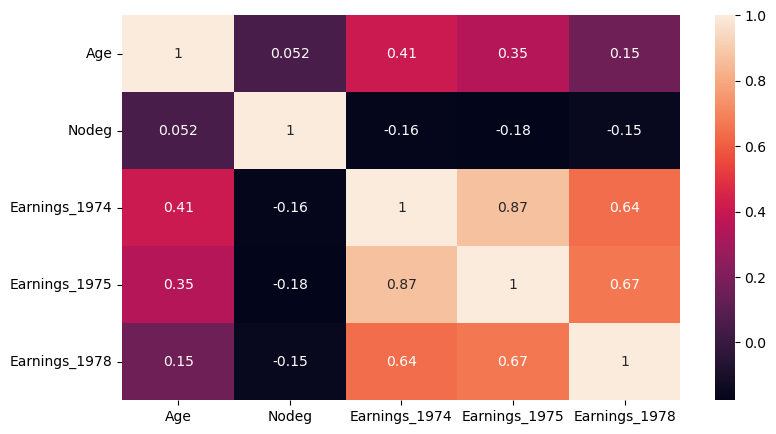

In [55]:
# Let us study the heat map Correlation for multi-collinearity to check assumption 5
plt.figure(figsize=(9,5))
sns.heatmap(df_num.corr(), annot=True)


In [56]:
df.shape

(15992, 9)

# 1974_earning and 1975_earning are highly correlated with each other..This may cause Multi-collinearity

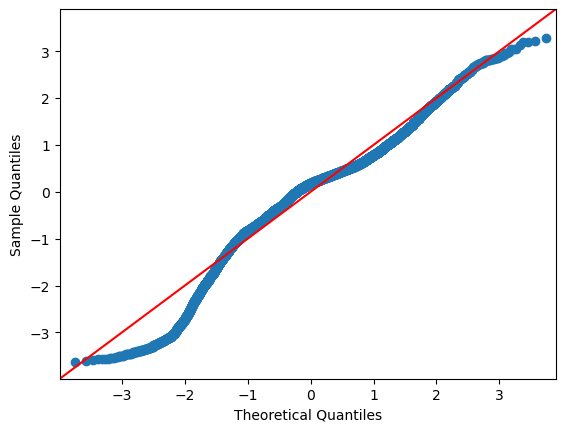

In [57]:
# define residual
res = model.resid
# create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

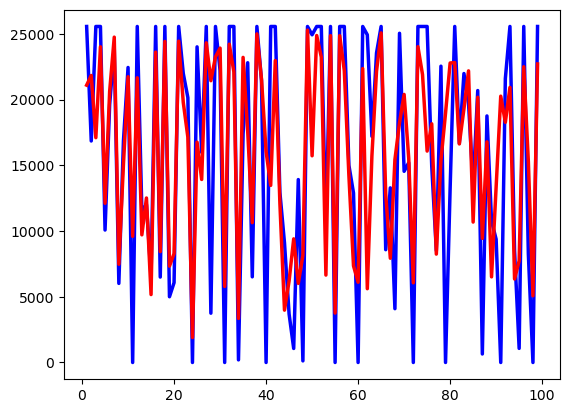

In [58]:
## Not a promising plot .. so let us plot actual and predicted.. Since there are many values let us look at 100 values
cnt=[i for i in range(1,100,1)]
fig = plt.figure()
plt.plot(cnt,Y_test[1:100],color="blue", linewidth=2.5,linestyle="-")
plt.plot(cnt,y_pred[1:100],color="red", linewidth=2.5,linestyle="-")
plt.show()

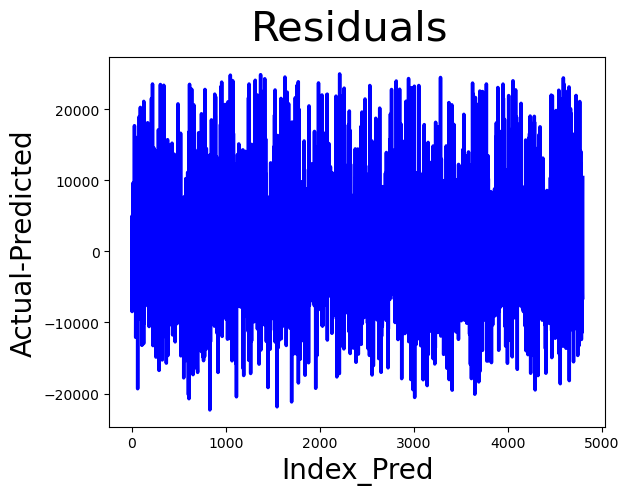

In [61]:
## Plotting the residuals 30% of 15992 = 4797 but take 4799 since dimension vary
cnt = [i for i in range(1,4799,1)]
fig=plt.figure()
plt.plot(cnt,y_pred-Y_test, color = 'blue', linewidth = 2.5, linestyle = '-')
fig.suptitle('Residuals',fontsize = 30)
plt.xlabel('Index_Pred', fontsize = 20)
plt.ylabel('Actual-Predicted', fontsize = 20)
plt.show()

In [62]:
# VIF (Variance Inflation Factor) measures Multi-Collinearity; VIF of > 4 means Multicollinearity exists
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
# We will calculate VIF for each X variable and store in another df
vif=pd.DataFrame()
vif['VIF FACTOR'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['FEATURES'] = X.columns
vif.round(2)

C:\Users\sagar\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF FACTOR                       FEATURES
0         1.37                            Age
1          inf                          Nodeg
2         4.41                  Earnings_1974
3         4.18                  Earnings_1975
4          inf          Eduacation_HighSchool
5          inf        Eduacation_Intermediate
6          inf  Eduacation_LessThanHighSchool
7          inf        Eduacation_PostGraduate
8          inf            Eduacation_graduate
9          inf                  Race_NotBlack
10         inf                     Race_black
11         inf               Hisp_NotHispanic
12         inf                  Hisp_hispanic
13         inf          MaritalStatus_Married
14         inf       MaritalStatus_NotMarried

In [64]:
# since EArning_1974 has highest vif vaue i.e >4 therfore drop that column

In [65]:
df_num = df[['Age','Nodeg', 'Earnings_1975', 'Earnings_1978']]

In [66]:
X=df_final[['Age', 'Nodeg', 'Earnings_1975','Eduacation_HighSchool', 'Eduacation_Intermediate',
       'Eduacation_LessThanHighSchool', 'Eduacation_PostGraduate',
       'Eduacation_graduate', 'Race_NotBlack', 'Race_black',
       'Hisp_NotHispanic', 'Hisp_hispanic', 'MaritalStatus_Married',
       'MaritalStatus_NotMarried']]

In [67]:
Y=df_final[['Earnings_1978']]

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,train_size = 0.7, random_state = 100)

In [70]:
# fitting our simple linear regression model to the training set
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, Y_train)

LinearRegression()

In [71]:
print('Intercept is: ',lrm.intercept_)
print('Coeff_of determination R^2 is: ',lrm.score(X_train,Y_train)) # R^2 is of train dataset
print("Coef for Variable are:",lrm.coef_)

Intercept is:  [7208.30409816]
Coeff_of determination R^2 is:  0.4613741729595051
Coef for Variable are: [[ -79.56715329 -323.24886895    0.71766275 -271.34149571 -183.98378646
  -323.24886895  473.55807935  305.01607177  473.93024032 -473.93024032
   390.80655525 -390.80655525  156.69993091 -156.69993091]]


In [39]:
# predicted Score Y^
y_pred = lrm.predict(X_test)

In [40]:
y_pred

array([[16540.04007348],
       [21097.91690793],
       [21837.01538353],
       ...,
       [16316.77749664],
       [16704.39653637],
       [10399.89541609]])

In [43]:
## Evaluation of model using MAE/MAPE (mean of absolute error which is the difference between actual and predicted values)
## MSE (mean value of squared error), RMSE (interprets error in terms of Y)

from sklearn import metrics
print('MAE',metrics.mean_absolute_error(Y_test, y_pred))
print('MSE',metrics.mean_squared_error(Y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
from sklearn.metrics import r2_score
print("R-Squared of test_data : ",r2_score(Y_test,y_pred))  ## This is for Test data

MAE 5251.856013853202
MSE 50283398.726649925
RMSE 7091.078812610245
R-Squared of test_data :  0.46392890870643777


In [44]:
X_train_sm = X_train

In [45]:
X_train_sm = sm.add_constant(X_train_sm)

In [46]:
model = sm.OLS(Y_train,X_train_sm).fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Earnings_1978   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1031.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:00:14   Log-Likelihood:            -1.1490e+05
No. Observations:               11194   AIC:                         2.298e+05
Df Residuals:                   11183   BIC:                         2.299e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          2756.1692    103.746     26.566      0.000    2552.808    2959.530
Age                            -105.1982      6.927    -15.187      0.000    -118.776     -91.620
Nodeg                            14.4860     70.800      0.205      0.838    -124.295     153.267
Earnings_1974                     0.2874      0.015     19.804      0.000       0.259       0.316
Earnings_1975                     0.4770      0.015     32.677      0.000       0.448       0.506
Eduacation_HighSchool           205.4823    118.181      1.739      0.082     -26.173     437.138
Eduacation_Intermediate         341.9696    150.048      2.279      0.023      47.849     636.091
Eduacation_LessThanHighSchool    14.4860     70.800      0.205      0.838    -124.295     153.267
Eduacation_PostGraduate        1203.3683    231.089      5.207      0.000     750.393    1656.344
Eduacation_graduate             990.8630    194.046      5.106      0.000     610.498    1371.228
Race_NotBlack                  1833.3611    115.143     15.922      0.000    1607.660    2059.062
Race_black                      922.8082    155.988      5.916      0.000     617.045    1228.572
Hisp_NotHispanic               1697.0512    116.367     14.584      0.000    1468.952    1925.151
Hisp_hispanic                  1059.1180    158.368      6.688      0.000     748.689    1369.547
MaritalStatus_Married          1371.2862    109.402     12.534      0.000    1156.840    1585.733
MaritalStatus_NotMarried       1384.8830     87.820     15.770      0.000    1212.741    1557.025
==============================================================================
Omnibus:                     1109.071   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1997.641
Skew:                          -0.683   Prob(JB):                         0.00
Kurtosis:                       4.555   Cond. No.                     9.27e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.22e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
model.params

const                            2756.169241
Age                              -105.198175
Nodeg                              14.486043
Earnings_1974                       0.287449
Earnings_1975                       0.477042
Eduacation_HighSchool             205.482290
Eduacation_Intermediate           341.969611
Eduacation_LessThanHighSchool      14.486043
Eduacation_PostGraduate          1203.368283
Eduacation_graduate               990.863014
Race_NotBlack                    1833.361060
Race_black                        922.808181
Hisp_NotHispanic                 1697.051231
Hisp_hispanic                    1059.118010
MaritalStatus_Married            1371.286239
MaritalStatus_NotMarried         1384.883003
dtype: float64

<Axes: >

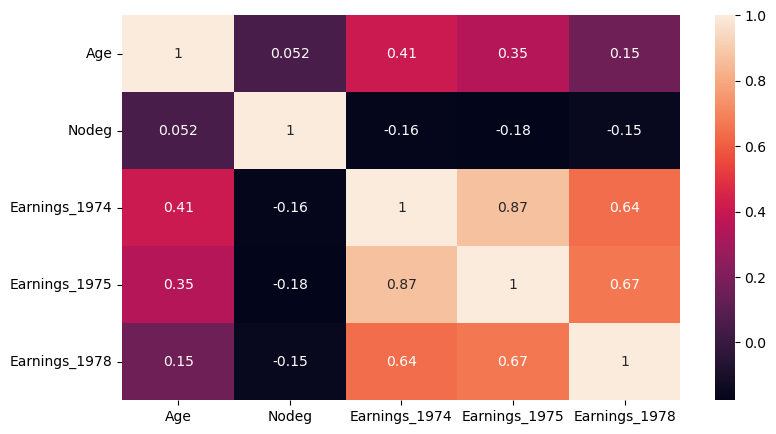

In [49]:
# Let us study the heat map Correlation for multi-collinearity to check assumption 5
plt.figure(figsize=(9,5))
sns.heatmap(df_num.corr(), annot=True)


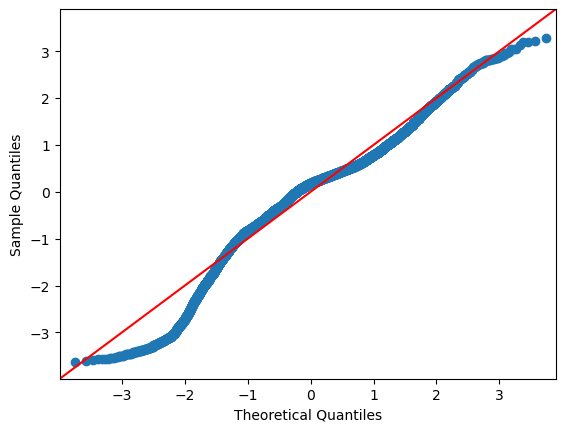

In [50]:
# define residual
res = model.resid
# create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

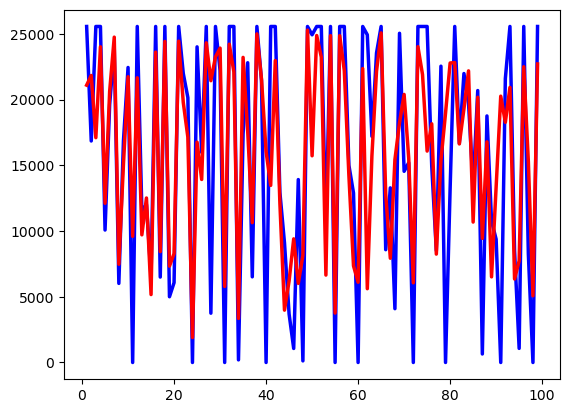

In [51]:
## Not a promising plot .. so let us plot actual and predicted.. Since there are many values let us look at 100 values
cnt=[i for i in range(1,100,1)]
fig = plt.figure()
plt.plot(cnt,Y_test[1:100],color="blue", linewidth=2.5,linestyle="-")
plt.plot(cnt,y_pred[1:100],color="red", linewidth=2.5,linestyle="-")
plt.show()


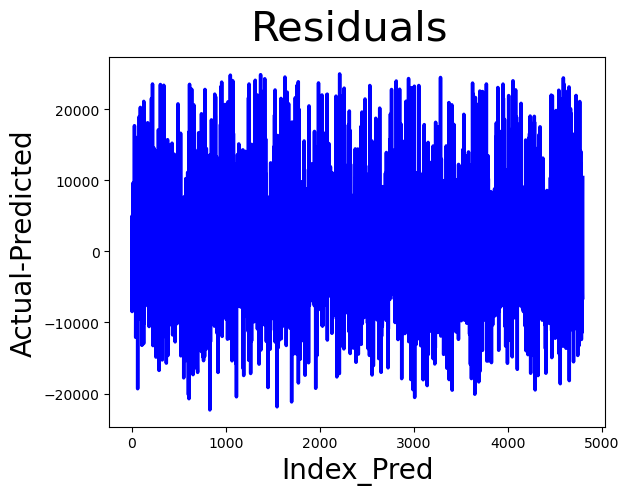

In [52]:
## Plotting the residuals 30% of 15992 = 4797 but take 4799 since dimension vary
cnt = [i for i in range(1,4799,1)]
fig=plt.figure()
plt.plot(cnt,y_pred-Y_test, color = 'blue', linewidth = 2.5, linestyle = '-')
fig.suptitle('Residuals',fontsize = 30)
plt.xlabel('Index_Pred', fontsize = 20)
plt.ylabel('Actual-Predicted', fontsize = 20)
plt.show()


In [53]:
# VIF (Variance Inflation Factor) measures Multi-Collinearity; VIF of > 4 means Multicollinearity exists
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [54]:
# We will calculate VIF for each X variable and store in another df
vif=pd.DataFrame()
vif['VIF FACTOR'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['FEATURES'] = X.columns
vif.round(2)


C:\Users\sagar\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF FACTOR                       FEATURES
0         1.37                            Age
1          inf                          Nodeg
2         4.41                  Earnings_1974
3         4.18                  Earnings_1975
4          inf          Eduacation_HighSchool
5          inf        Eduacation_Intermediate
6          inf  Eduacation_LessThanHighSchool
7          inf        Eduacation_PostGraduate
8          inf            Eduacation_graduate
9          inf                  Race_NotBlack
10         inf                     Race_black
11         inf               Hisp_NotHispanic
12         inf                  Hisp_hispanic
13         inf          MaritalStatus_Married
14         inf       MaritalStatus_NotMarried

Now multicollinearity doesnt exist so lets go for those attribute where p-value> alpha(0.05)

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Earnings_1978   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1031.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:00:40   Log-Likelihood:            -1.1490e+05
No. Observations:               11194   AIC:                         2.298e+05
Df Residuals:                   11183   BIC:                         2.299e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          2756.1692    103.746     26.566      0.000    2552.808    2959.530
Age                            -105.1982      6.927    -15.187      0.000    -118.776     -91.620
Nodeg                            14.4860     70.800      0.205      0.838    -124.295     153.267
Earnings_1974                     0.2874      0.015     19.804      0.000       0.259       0.316
Earnings_1975                     0.4770      0.015     32.677      0.000       0.448       0.506
Eduacation_HighSchool           205.4823    118.181      1.739      0.082     -26.173     437.138
Eduacation_Intermediate         341.9696    150.048      2.279      0.023      47.849     636.091
Eduacation_LessThanHighSchool    14.4860     70.800      0.205      0.838    -124.295     153.267
Eduacation_PostGraduate        1203.3683    231.089      5.207      0.000     750.393    1656.344
Eduacation_graduate             990.8630    194.046      5.106      0.000     610.498    1371.228
Race_NotBlack                  1833.3611    115.143     15.922      0.000    1607.660    2059.062
Race_black                      922.8082    155.988      5.916      0.000     617.045    1228.572
Hisp_NotHispanic               1697.0512    116.367     14.584      0.000    1468.952    1925.151
Hisp_hispanic                  1059.1180    158.368      6.688      0.000     748.689    1369.547
MaritalStatus_Married          1371.2862    109.402     12.534      0.000    1156.840    1585.733
MaritalStatus_NotMarried       1384.8830     87.820     15.770      0.000    1212.741    1557.025
==============================================================================
Omnibus:                     1109.071   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1997.641
Skew:                          -0.683   Prob(JB):                         0.00
Kurtosis:                       4.555   Cond. No.                     9.27e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.22e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
# Nodeg & Eduacation_LessThanHighSchool having p-value>0.05
# lets drop Nodeg

In [57]:
X=df_final[['Age', 'Earnings_1975','Eduacation_HighSchool', 'Eduacation_Intermediate',
       'Eduacation_LessThanHighSchool', 'Eduacation_PostGraduate',
       'Eduacation_graduate', 'Race_NotBlack', 'Race_black',
       'Hisp_NotHispanic', 'Hisp_hispanic', 'MaritalStatus_Married',
       'MaritalStatus_NotMarried']]

In [58]:
Y=df_final[['Earnings_1978']]

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X,Y,train_size = 0.7, random_state = 100)

In [60]:
# fitting our simple linear regression model to the training set
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, Y_train)


LinearRegression()

In [61]:
print('Intercept is: ',lrm.intercept_)
print('Coeff_of determination R^2 is: ',lrm.score(X_train,Y_train)) # R^2 is of train dataset
print("Coef for Variable are:",lrm.coef_)


Intercept is:  [7143.65432437]
Coeff_of determination R^2 is:  0.4613741729595051
Coef for Variable are: [[ -79.56715329    0.71766275 -206.69172192 -119.33401268 -581.8479641
   538.20785314  369.66584556  473.93024032 -473.93024032  390.80655525
  -390.80655525  156.69993091 -156.69993091]]


In [62]:
# predicted Score Y^
y_pred = lrm.predict(X_test)

In [63]:
y_pred

array([[17197.64613392],
       [20852.94770373],
       [21598.94747587],
       ...,
       [14770.81255985],
       [18790.34407143],
       [10134.13722038]])

In [64]:
## Evaluation of model using MAE/MAPE (mean of absolute error which is the difference between actual and predicted values)
## MSE (mean value of squared error), RMSE (interprets error in terms of Y)

from sklearn import metrics
print('MAE',metrics.mean_absolute_error(Y_test, y_pred))
print('MSE',metrics.mean_squared_error(Y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
from sklearn.metrics import r2_score
print("R-Squared of test_data : ",r2_score(Y_test,y_pred))  ## This is for Test data

MAE 5410.021977661522
MSE 52309579.38475543
RMSE 7232.536165464742
R-Squared of test_data :  0.442327805677321


In [65]:
X_train_sm = X_train

In [66]:
X_train_sm = sm.add_constant(X_train_sm)


In [67]:
model = sm.OLS(Y_train,X_train_sm).fit()

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Earnings_1978   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     1064.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:03:02   Log-Likelihood:            -1.1510e+05
No. Observations:               11194   AIC:                         2.302e+05
Df Residuals:                   11184   BIC:                         2.303e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          2645.7979    105.093     25.176      0.000    2439.797    2851.799
Age                             -79.5672      6.923    -11.493      0.000     -93.137     -65.997
Earnings_1975                     0.7177      0.008     87.169      0.000       0.702       0.734
Eduacation_HighSchool           322.4679    118.063      2.731      0.006      91.044     553.892
Eduacation_Intermediate         409.8256    152.971      2.679      0.007     109.976     709.675
Eduacation_LessThanHighSchool   -52.6884    130.654     -0.403      0.687    -308.794     203.417
Eduacation_PostGraduate        1067.3674    239.352      4.459      0.000     598.196    1536.539
Eduacation_graduate             898.8254    200.279      4.488      0.000     506.243    1291.408
Race_NotBlack                  1796.8292    117.159     15.337      0.000    1567.177    2026.482
Race_black                      848.9687    158.522      5.356      0.000     538.238    1159.700
Hisp_NotHispanic               1713.7055    118.542     14.457      0.000    1481.343    1946.068
Hisp_hispanic                   932.0924    160.765      5.798      0.000     616.964    1247.221
MaritalStatus_Married          1479.5989    111.251     13.300      0.000    1261.528    1697.670
MaritalStatus_NotMarried       1166.1990     88.340     13.201      0.000     993.036    1339.362
==============================================================================
Omnibus:                      954.800   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1695.067
Skew:                          -0.610   Prob(JB):                         0.00
Kurtosis:                       4.465   Cond. No.                     1.05e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.81e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
model.params

const                            2645.797898
Age                               -79.567153
Earnings_1975                       0.717663
Eduacation_HighSchool             322.467858
Eduacation_Intermediate           409.825567
Eduacation_LessThanHighSchool     -52.688385
Eduacation_PostGraduate          1067.367433
Eduacation_graduate               898.825425
Race_NotBlack                    1796.829189
Race_black                        848.968709
Hisp_NotHispanic                 1713.705504
Hisp_hispanic                     932.092394
MaritalStatus_Married            1479.598880
MaritalStatus_NotMarried         1166.199018
dtype: float64

In [70]:
df_num = df[['Age', 'Earnings_1975', 'Earnings_1978']]

<Axes: >

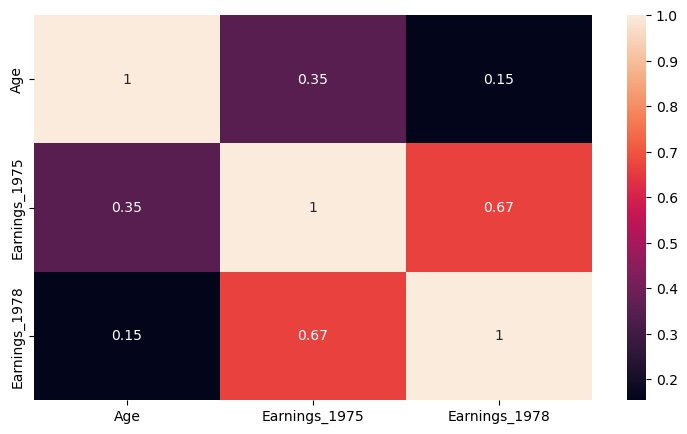

In [71]:
# Let us study the heat map Correlation for multi-collinearity to check assumption 5
plt.figure(figsize=(9,5))
sns.heatmap(df_num.corr(), annot=True)

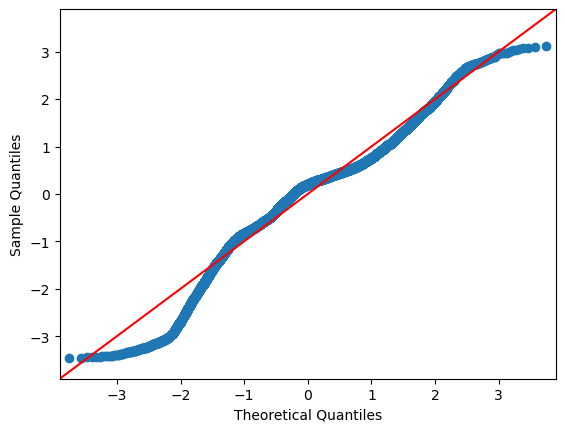

In [72]:
# define residual
res = model.resid
# create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

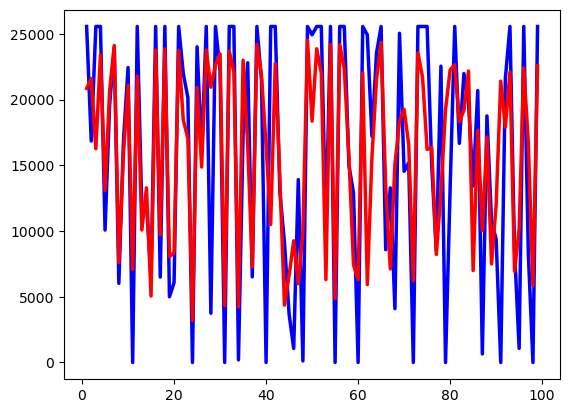

In [73]:
## Not a promising plot .. so let us plot actual and predicted.. Since there are many values let us look at 100 values
cnt=[i for i in range(1,100,1)]
fig = plt.figure()
plt.plot(cnt,Y_test[1:100],color="blue", linewidth=2.5,linestyle="-")
plt.plot(cnt,y_pred[1:100],color="red", linewidth=2.5,linestyle="-")
plt.show()


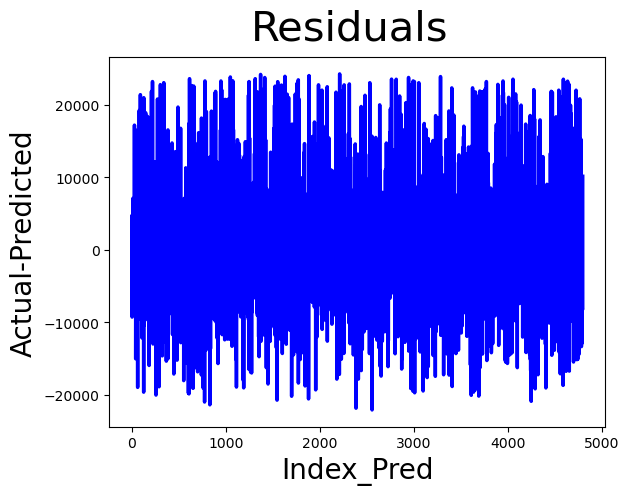

In [74]:
## Plotting the residuals 30% of 15992 = 4797 but take 4799 since dimension vary
cnt = [i for i in range(1,4799,1)]
fig=plt.figure()
plt.plot(cnt,y_pred-Y_test, color = 'blue', linewidth = 2.5, linestyle = '-')
fig.suptitle('Residuals',fontsize = 30)
plt.xlabel('Index_Pred', fontsize = 20)
plt.ylabel('Actual-Predicted', fontsize = 20)
plt.show()

In [75]:
# VIF (Variance Inflation Factor) measures Multi-Collinearity; VIF of > 4 means Multicollinearity exists
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We will calculate VIF for each X variable and store in another df
vif=pd.DataFrame()
vif['VIF FACTOR'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['FEATURES'] = X.columns
vif.round(2)


C:\Users\sagar\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF FACTOR                       FEATURES
0         1.33                            Age
1         1.30                  Earnings_1975
2          inf          Eduacation_HighSchool
3          inf        Eduacation_Intermediate
4          inf  Eduacation_LessThanHighSchool
5          inf        Eduacation_PostGraduate
6          inf            Eduacation_graduate
7          inf                  Race_NotBlack
8          inf                     Race_black
9          inf               Hisp_NotHispanic
10         inf                  Hisp_hispanic
11         inf          MaritalStatus_Married
12         inf       MaritalStatus_NotMarried

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Earnings_1978   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     1064.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:03:31   Log-Likelihood:            -1.1510e+05
No. Observations:               11194   AIC:                         2.302e+05
Df Residuals:                   11184   BIC:                         2.303e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          2645.7979    105.093     25.176      0.000    2439.797    2851.799
Age                             -79.5672      6.923    -11.493      0.000     -93.137     -65.997
Earnings_1975                     0.7177      0.008     87.169      0.000       0.702       0.734
Eduacation_HighSchool           322.4679    118.063      2.731      0.006      91.044     553.892
Eduacation_Intermediate         409.8256    152.971      2.679      0.007     109.976     709.675
Eduacation_LessThanHighSchool   -52.6884    130.654     -0.403      0.687    -308.794     203.417
Eduacation_PostGraduate        1067.3674    239.352      4.459      0.000     598.196    1536.539
Eduacation_graduate             898.8254    200.279      4.488      0.000     506.243    1291.408
Race_NotBlack                  1796.8292    117.159     15.337      0.000    1567.177    2026.482
Race_black                      848.9687    158.522      5.356      0.000     538.238    1159.700
Hisp_NotHispanic               1713.7055    118.542     14.457      0.000    1481.343    1946.068
Hisp_hispanic                   932.0924    160.765      5.798      0.000     616.964    1247.221
MaritalStatus_Married          1479.5989    111.251     13.300      0.000    1261.528    1697.670
MaritalStatus_NotMarried       1166.1990     88.340     13.201      0.000     993.036    1339.362
==============================================================================
Omnibus:                      954.800   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1695.067
Skew:                          -0.610   Prob(JB):                         0.00
Kurtosis:                       4.465   Cond. No.                     1.05e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.81e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [79]:
#dropping 'Eduacation_LessThanHighSchool'
X=df_final[['Age', 'Earnings_1975','Eduacation_HighSchool', 'Eduacation_Intermediate',
        'Eduacation_PostGraduate',
       'Eduacation_graduate', 'Race_NotBlack', 'Race_black',
       'Hisp_NotHispanic', 'Hisp_hispanic', 'MaritalStatus_Married',
       'MaritalStatus_NotMarried']]

In [80]:
Y=df_final[['Earnings_1978']]

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X,Y,train_size = 0.7, random_state = 100)

In [82]:
# fitting our simple linear regression model to the training set
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, Y_train)

LinearRegression()

In [83]:
print('Intercept is: ',lrm.intercept_)
print('Coeff_of determination R^2 is: ',lrm.score(X_train,Y_train)) # R^2 is of train dataset
print("Coef for Variable are:",lrm.coef_)

Intercept is:  [6561.80636027]
Coeff_of determination R^2 is:  0.4613741729595051
Coef for Variable are: [[-7.95671533e+01  7.17662754e-01  3.75156242e+02  4.62513951e+02
   1.12005582e+03  9.51513810e+02  4.73930240e+02 -4.73930240e+02
   3.90806555e+02 -3.90806555e+02  1.56699931e+02 -1.56699931e+02]]


In [84]:
# predicted Score Y^
y_pred = lrm.predict(X_test)

In [85]:
y_pred

array([[17197.64613392],
       [20852.94770373],
       [21598.94747587],
       ...,
       [14770.81255985],
       [18790.34407143],
       [10134.13722038]])

In [86]:
## Evaluation of model using MAE/MAPE (mean of absolute error which is the difference between actual and predicted values)
## MSE (mean value of squared error), RMSE (interprets error in terms of Y)

from sklearn import metrics
print('MAE',metrics.mean_absolute_error(Y_test, y_pred))
print('MSE',metrics.mean_squared_error(Y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
from sklearn.metrics import r2_score
print("R-Squared of test_data : ",r2_score(Y_test,y_pred))  ## This is for Test data

MAE 5410.021977661522
MSE 52309579.38475543
RMSE 7232.536165464742
R-Squared of test_data :  0.442327805677321


In [87]:
X_train_sm = X_train

X_train_sm = sm.add_constant(X_train_sm)

model = sm.OLS(Y_train,X_train_sm).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Earnings_1978   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     1064.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:05:20   Log-Likelihood:            -1.1510e+05
No. Observations:               11194   AIC:                         2.302e+05
Df Residuals:                   11184   BIC:                         2.303e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2624.7225    115.865     22.653      0.000    2397.607    2851.838
Age                        -79.5672      6.923    -11.493      0.000     -93.137     -65.997
Earnings_1975                0.7177      0.008     87.169      0.000       0.702       0.734
Eduacation_HighSchool      375.1562    167.368      2.242      0.025      47.085     703.227
Eduacation_Intermediate    462.5140    208.025      2.223      0.026      54.749     870.279
Eduacation_PostGraduate   1120.0558    310.493      3.607      0.000     511.435    1728.677
Eduacation_graduate        951.5138    265.234      3.587      0.000     431.609    1471.419
Race_NotBlack             1786.2915    120.649     14.806      0.000    1549.798    2022.785
Race_black                 838.4310    159.654      5.252      0.000     525.481    1151.381
Hisp_NotHispanic          1703.1678    123.200     13.824      0.000    1461.674    1944.662
Hisp_hispanic              921.5547    160.964      5.725      0.000     606.036    1237.073
MaritalStatus_Married     1469.0612    115.475     12.722      0.000    1242.711    1695.412
MaritalStatus_NotMarried  1155.6613     89.646     12.891      0.000     979.939    1331.383
==============================================================================
Omnibus:                      954.800   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1695.067
Skew:                          -0.610   Prob(JB):                         0.00
Kurtosis:                       4.465   Cond. No.                     5.02e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [88]:
model.params


const                       2624.722544
Age                          -79.567153
Earnings_1975                  0.717663
Eduacation_HighSchool        375.156242
Eduacation_Intermediate      462.513951
Eduacation_PostGraduate     1120.055817
Eduacation_graduate          951.513810
Race_NotBlack               1786.291512
Race_black                   838.431032
Hisp_NotHispanic            1703.167827
Hisp_hispanic                921.554717
MaritalStatus_Married       1469.061203
MaritalStatus_NotMarried    1155.661341
dtype: float64

In [89]:
df.shape

(15992, 9)

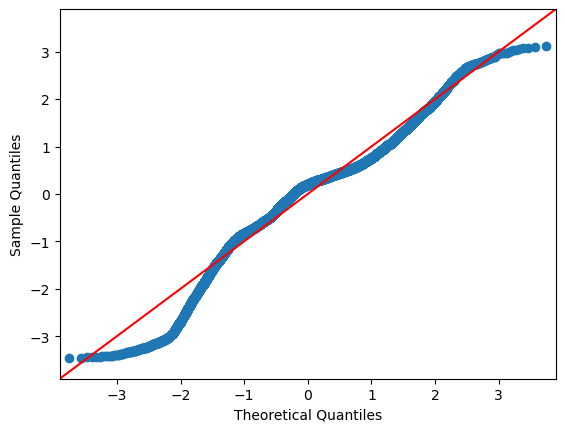

In [90]:
# define residual
res = model.resid
# create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

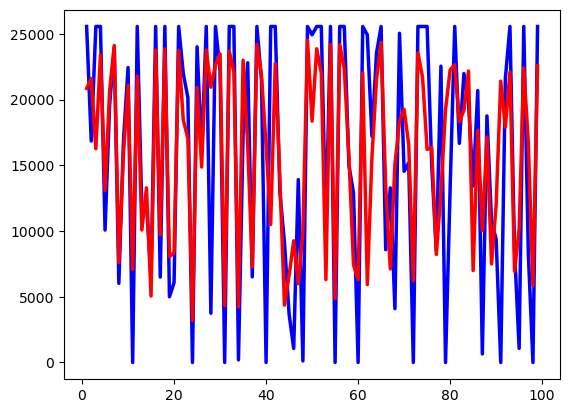

In [91]:
## Not a promising plot .. so let us plot actual and predicted.. Since there are many values let us look at 100 values
cnt=[i for i in range(1,100,1)]
fig = plt.figure()
plt.plot(cnt,Y_test[1:100],color="blue", linewidth=2.5,linestyle="-")
plt.plot(cnt,y_pred[1:100],color="red", linewidth=2.5,linestyle="-")
plt.show()

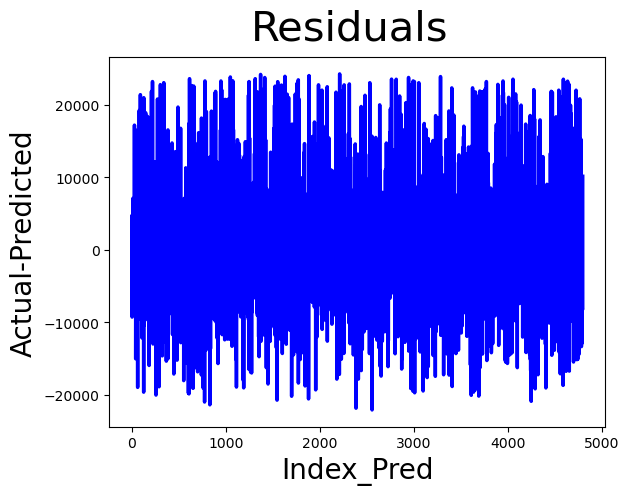

In [92]:
## Plotting the residuals 30% of 15992 = 4797 but take 4799 since dimension vary
cnt = [i for i in range(1,4799,1)]
fig=plt.figure()
plt.plot(cnt,y_pred-Y_test, color = 'blue', linewidth = 2.5, linestyle = '-')
fig.suptitle('Residuals',fontsize = 30)
plt.xlabel('Index_Pred', fontsize = 20)
plt.ylabel('Actual-Predicted', fontsize = 20)
plt.show()

In [93]:
# VIF (Variance Inflation Factor) measures Multi-Collinearity; VIF of > 4 means Multicollinearity exists
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We will calculate VIF for each X variable and store in another df
vif=pd.DataFrame()
vif['VIF FACTOR'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['FEATURES'] = X.columns
vif.round(2)

C:\Users\sagar\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF FACTOR                  FEATURES
0         1.33                       Age
1         1.30             Earnings_1975
2         1.50     Eduacation_HighSchool
3         1.36   Eduacation_Intermediate
4         1.15   Eduacation_PostGraduate
5         1.23       Eduacation_graduate
6          inf             Race_NotBlack
7          inf                Race_black
8          inf          Hisp_NotHispanic
9          inf             Hisp_hispanic
10         inf     MaritalStatus_Married
11         inf  MaritalStatus_NotMarried

# now lets drop 'Eduacation_LessThanHighSchool' first than 'Nodeg'

In [94]:
X=df_final[['Age', 'Nodeg', 'Earnings_1975','Eduacation_HighSchool', 'Eduacation_Intermediate',
       'Eduacation_PostGraduate',
       'Eduacation_graduate', 'Race_NotBlack', 'Race_black',
       'Hisp_NotHispanic', 'Hisp_hispanic', 'MaritalStatus_Married',
       'MaritalStatus_NotMarried']]

In [95]:

Y=df_final[['Earnings_1978']]


In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X,Y,train_size = 0.7, random_state = 100)

# fitting our simple linear regression model to the training set
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, Y_train)

LinearRegression()

In [97]:
print('Intercept is: ',lrm.intercept_)
print('Coeff_of determination R^2 is: ',lrm.score(X_train,Y_train)) # R^2 is of train dataset
print("Coef for Variable are:",lrm.coef_)


Intercept is:  [7143.65432437]
Coeff_of determination R^2 is:  0.4613741729595052
Coef for Variable are: [[ -79.56715329 -581.8479641     0.71766275 -206.69172192 -119.33401268
   538.20785314  369.66584556  473.93024032 -473.93024032  390.80655525
  -390.80655525  156.69993091 -156.69993091]]


In [98]:
# predicted Score Y^
y_pred = lrm.predict(X_test)

In [99]:
y_pred

array([[17197.64613392],
       [20852.94770373],
       [21598.94747587],
       ...,
       [14770.81255985],
       [18790.34407143],
       [10134.13722038]])

In [101]:
## Evaluation of model using MAE/MAPE (mean of absolute error which is the difference between actual and predicted values)
## MSE (mean value of squared error), RMSE (interprets error in terms of Y)

from sklearn import metrics
print('MAE',metrics.mean_absolute_error(Y_test, y_pred))
print('MSE',metrics.mean_squared_error(Y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
from sklearn.metrics import r2_score
print("R-Squared of test_data : ",r2_score(Y_test,y_pred))  ## This is for Test data

MAE 5410.021977661525
MSE 52309579.384755425
RMSE 7232.536165464741
R-Squared of test_data :  0.442327805677321


In [102]:
X_train_sm = X_train

X_train_sm = sm.add_constant(X_train_sm)

model = sm.OLS(Y_train,X_train_sm).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Earnings_1978   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     1064.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:06:41   Log-Likelihood:            -1.1510e+05
No. Observations:               11194   AIC:                         2.302e+05
Df Residuals:                   11184   BIC:                         2.303e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2645.7979    105.093     25.176      0.000    2439.797    2851.799
Age                        -79.5672      6.923    -11.493      0.000     -93.137     -65.997
Nodeg                      -52.6884    130.654     -0.403      0.687    -308.794     203.417
Earnings_1975                0.7177      0.008     87.169      0.000       0.702       0.734
Eduacation_HighSchool      322.4679    118.063      2.731      0.006      91.044     553.892
Eduacation_Intermediate    409.8256    152.971      2.679      0.007     109.976     709.675
Eduacation_PostGraduate   1067.3674    239.352      4.459      0.000     598.196    1536.539
Eduacation_graduate        898.8254    200.279      4.488      0.000     506.243    1291.408
Race_NotBlack             1796.8292    117.159     15.337      0.000    1567.177    2026.482
Race_black                 848.9687    158.522      5.356      0.000     538.238    1159.700
Hisp_NotHispanic          1713.7055    118.542     14.457      0.000    1481.343    1946.068
Hisp_hispanic              932.0924    160.765      5.798      0.000     616.964    1247.221
MaritalStatus_Married     1479.5989    111.251     13.300      0.000    1261.528    1697.670
MaritalStatus_NotMarried  1166.1990     88.340     13.201      0.000     993.036    1339.362
==============================================================================
Omnibus:                      954.800   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1695.067
Skew:                          -0.610   Prob(JB):                         0.00
Kurtosis:                       4.465   Cond. No.                     6.51e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.26e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

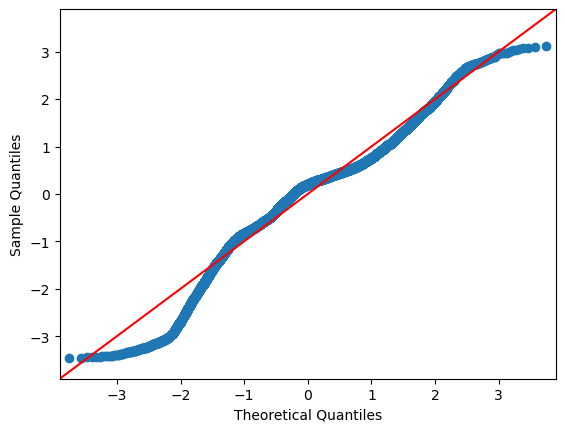

In [103]:
# define residual
res = model.resid
# create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

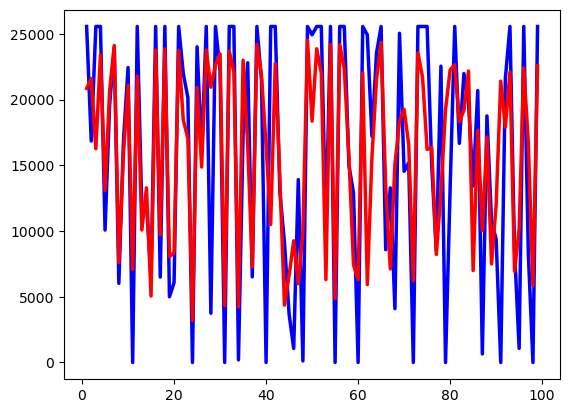

In [104]:
## Not a promising plot .. so let us plot actual and predicted.. Since there are many values let us look at 100 values
cnt=[i for i in range(1,100,1)]
fig = plt.figure()
plt.plot(cnt,Y_test[1:100],color="blue", linewidth=2.5,linestyle="-")
plt.plot(cnt,y_pred[1:100],color="red", linewidth=2.5,linestyle="-")
plt.show()


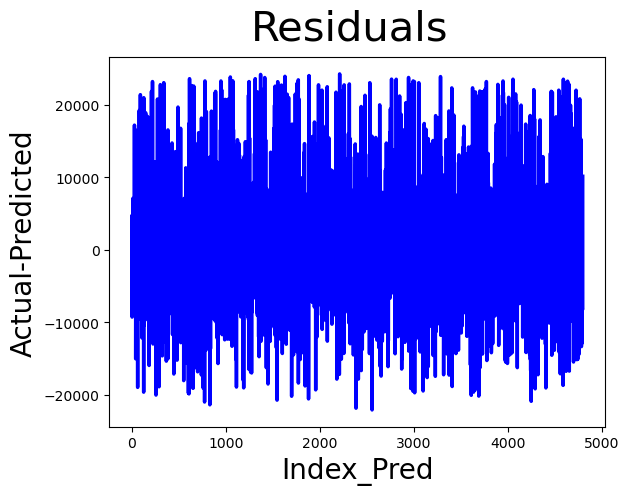

In [105]:
## Plotting the residuals 30% of 15992 = 4797 but take 4799 since dimension vary
cnt = [i for i in range(1,4799,1)]
fig=plt.figure()
plt.plot(cnt,y_pred-Y_test, color = 'blue', linewidth = 2.5, linestyle = '-')
fig.suptitle('Residuals',fontsize = 30)
plt.xlabel('Index_Pred', fontsize = 20)
plt.ylabel('Actual-Predicted', fontsize = 20)
plt.show()


In [106]:
# VIF (Variance Inflation Factor) measures Multi-Collinearity; VIF of > 4 means Multicollinearity exists
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We will calculate VIF for each X variable and store in another df
vif=pd.DataFrame()
vif['VIF FACTOR'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['FEATURES'] = X.columns
vif.round(2)

C:\Users\sagar\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF FACTOR                  FEATURES
0         1.33                       Age
1          inf                     Nodeg
2         1.30             Earnings_1975
3          inf     Eduacation_HighSchool
4          inf   Eduacation_Intermediate
5          inf   Eduacation_PostGraduate
6          inf       Eduacation_graduate
7          inf             Race_NotBlack
8          inf                Race_black
9          inf          Hisp_NotHispanic
10         inf             Hisp_hispanic
11         inf     MaritalStatus_Married
12         inf  MaritalStatus_NotMarried

In [107]:
# let drop 'Nodeg' column

In [108]:
X=df_final[['Age', 'Earnings_1975','Eduacation_HighSchool', 'Eduacation_Intermediate',
        'Eduacation_PostGraduate',
       'Eduacation_graduate', 'Race_NotBlack', 'Race_black',
       'Hisp_NotHispanic', 'Hisp_hispanic', 'MaritalStatus_Married',
       'MaritalStatus_NotMarried']]

In [109]:
Y=df_final[['Earnings_1978']]

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X,Y,train_size = 0.7, random_state = 100)

# fitting our simple linear regression model to the training set
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, Y_train)

print('Intercept is: ',lrm.intercept_)
print('Coeff_of determination R^2 is: ',lrm.score(X_train,Y_train)) # R^2 is of train dataset
print("Coef for Variable are:",lrm.coef_)

Intercept is:  [6561.80636027]
Coeff_of determination R^2 is:  0.4613741729595051
Coef for Variable are: [[-7.95671533e+01  7.17662754e-01  3.75156242e+02  4.62513951e+02
   1.12005582e+03  9.51513810e+02  4.73930240e+02 -4.73930240e+02
   3.90806555e+02 -3.90806555e+02  1.56699931e+02 -1.56699931e+02]]


In [111]:
# predicted Score Y^
y_pred = lrm.predict(X_test)

In [112]:
y_pred

array([[17197.64613392],
       [20852.94770373],
       [21598.94747587],
       ...,
       [14770.81255985],
       [18790.34407143],
       [10134.13722038]])

In [114]:
## Evaluation of model using MAE/MAPE (mean of absolute error which is the difference between actual and predicted values)
## MSE (mean value of squared error), RMSE (interprets error in terms of Y)

from sklearn import metrics
print('MAE',metrics.mean_absolute_error(Y_test, y_pred))
print('MSE',metrics.mean_squared_error(Y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
from sklearn.metrics import r2_score
print("R-Squared of test_data : ",r2_score(Y_test,y_pred))  ## This is for Test data

MAE 5410.021977661522
MSE 52309579.38475543
RMSE 7232.536165464742
R-Squared of test_data :  0.442327805677321


In [115]:
X_train_sm = X_train

X_train_sm = sm.add_constant(X_train_sm)

model = sm.OLS(Y_train,X_train_sm).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Earnings_1978   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     1064.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:07:59   Log-Likelihood:            -1.1510e+05
No. Observations:               11194   AIC:                         2.302e+05
Df Residuals:                   11184   BIC:                         2.303e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2624.7225    115.865     22.653      0.000    2397.607    2851.838
Age                        -79.5672      6.923    -11.493      0.000     -93.137     -65.997
Earnings_1975                0.7177      0.008     87.169      0.000       0.702       0.734
Eduacation_HighSchool      375.1562    167.368      2.242      0.025      47.085     703.227
Eduacation_Intermediate    462.5140    208.025      2.223      0.026      54.749     870.279
Eduacation_PostGraduate   1120.0558    310.493      3.607      0.000     511.435    1728.677
Eduacation_graduate        951.5138    265.234      3.587      0.000     431.609    1471.419
Race_NotBlack             1786.2915    120.649     14.806      0.000    1549.798    2022.785
Race_black                 838.4310    159.654      5.252      0.000     525.481    1151.381
Hisp_NotHispanic          1703.1678    123.200     13.824      0.000    1461.674    1944.662
Hisp_hispanic              921.5547    160.964      5.725      0.000     606.036    1237.073
MaritalStatus_Married     1469.0612    115.475     12.722      0.000    1242.711    1695.412
MaritalStatus_NotMarried  1155.6613     89.646     12.891      0.000     979.939    1331.383
==============================================================================
Omnibus:                      954.800   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1695.067
Skew:                          -0.610   Prob(JB):                         0.00
Kurtosis:                       4.465   Cond. No.                     5.02e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

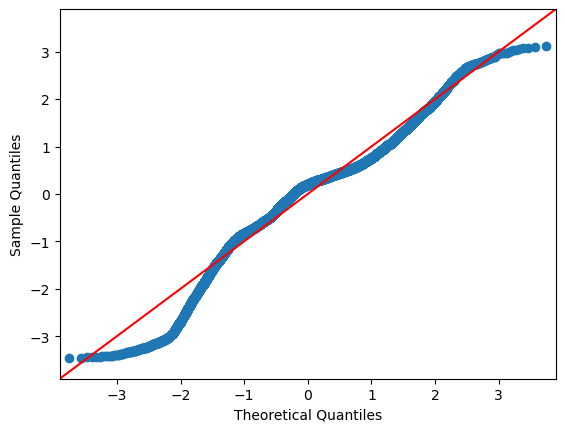

In [116]:
# define residual
res = model.resid
# create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()


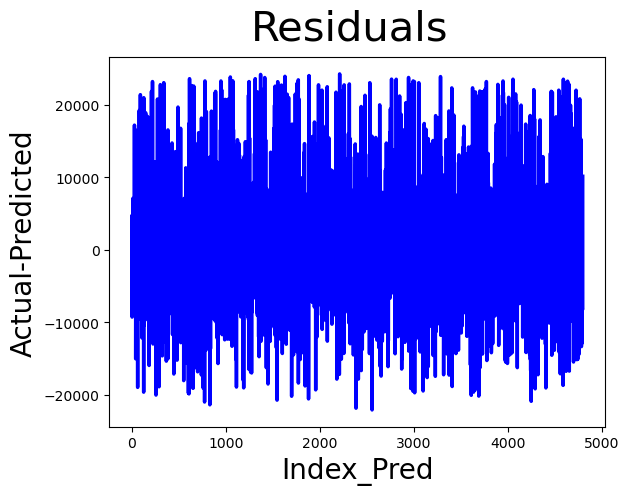

In [117]:
## Plotting the residuals 30% of 15992 = 4797 but take 4799 since dimension vary
cnt = [i for i in range(1,4799,1)]
fig=plt.figure()
plt.plot(cnt,y_pred-Y_test, color = 'blue', linewidth = 2.5, linestyle = '-')
fig.suptitle('Residuals',fontsize = 30)
plt.xlabel('Index_Pred', fontsize = 20)
plt.ylabel('Actual-Predicted', fontsize = 20)
plt.show()

In [118]:
# VIF (Variance Inflation Factor) measures Multi-Collinearity; VIF of > 4 means Multicollinearity exists
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We will calculate VIF for each X variable and store in another df
vif=pd.DataFrame()
vif['VIF FACTOR'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['FEATURES'] = X.columns
vif.round(2)

C:\Users\sagar\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF FACTOR                  FEATURES
0         1.33                       Age
1         1.30             Earnings_1975
2         1.50     Eduacation_HighSchool
3         1.36   Eduacation_Intermediate
4         1.15   Eduacation_PostGraduate
5         1.23       Eduacation_graduate
6          inf             Race_NotBlack
7          inf                Race_black
8          inf          Hisp_NotHispanic
9          inf             Hisp_hispanic
10         inf     MaritalStatus_Married
11         inf  MaritalStatus_NotMarried

# lets drop 'Eduacation_LessThanHighSchool' & 'Nodeg' together

In [119]:
X=df_final[['Age', 'Earnings_1975','Eduacation_HighSchool', 'Eduacation_Intermediate',
        'Eduacation_PostGraduate',
       'Eduacation_graduate', 'Race_NotBlack', 'Race_black',
       'Hisp_NotHispanic', 'Hisp_hispanic', 'MaritalStatus_Married',
       'MaritalStatus_NotMarried']]

In [120]:
Y=df_final[['Earnings_1978']]

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X,Y,train_size = 0.7, random_state = 100)

# fitting our simple linear regression model to the training set
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, Y_train)

print('Intercept is: ',lrm.intercept_)
print('Coeff_of determination R^2 is: ',lrm.score(X_train,Y_train)) # R^2 is of train dataset
print("Coef for Variable are:",lrm.coef_)


Intercept is:  [6561.80636027]
Coeff_of determination R^2 is:  0.4613741729595051
Coef for Variable are: [[-7.95671533e+01  7.17662754e-01  3.75156242e+02  4.62513951e+02
   1.12005582e+03  9.51513810e+02  4.73930240e+02 -4.73930240e+02
   3.90806555e+02 -3.90806555e+02  1.56699931e+02 -1.56699931e+02]]


In [122]:
# predicted Score Y^
y_pred = lrm.predict(X_test)
y_pred

array([[17197.64613392],
       [20852.94770373],
       [21598.94747587],
       ...,
       [14770.81255985],
       [18790.34407143],
       [10134.13722038]])

In [123]:
## Evaluation of model using MAE/MAPE (mean of absolute error which is the difference between actual and predicted values)
## MSE (mean value of squared error), RMSE (interprets error in terms of Y)

from sklearn import metrics
print('MAE',metrics.mean_absolute_error(Y_test, y_pred))
print('MSE',metrics.mean_squared_error(Y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
from sklearn.metrics import r2_score
print("R-Squared of test_data : ",r2_score(Y_test,y_pred))  ## This is for Test data

MAE 5410.021977661522
MSE 52309579.38475543
RMSE 7232.536165464742
R-Squared of test_data :  0.442327805677321


In [124]:
X_train_sm = X_train

X_train_sm = sm.add_constant(X_train_sm)

model = sm.OLS(Y_train,X_train_sm).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Earnings_1978   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     1064.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:08:53   Log-Likelihood:            -1.1510e+05
No. Observations:               11194   AIC:                         2.302e+05
Df Residuals:                   11184   BIC:                         2.303e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2624.7225    115.865     22.653      0.000    2397.607    2851.838
Age                        -79.5672      6.923    -11.493      0.000     -93.137     -65.997
Earnings_1975                0.7177      0.008     87.169      0.000       0.702       0.734
Eduacation_HighSchool      375.1562    167.368      2.242      0.025      47.085     703.227
Eduacation_Intermediate    462.5140    208.025      2.223      0.026      54.749     870.279
Eduacation_PostGraduate   1120.0558    310.493      3.607      0.000     511.435    1728.677
Eduacation_graduate        951.5138    265.234      3.587      0.000     431.609    1471.419
Race_NotBlack             1786.2915    120.649     14.806      0.000    1549.798    2022.785
Race_black                 838.4310    159.654      5.252      0.000     525.481    1151.381
Hisp_NotHispanic          1703.1678    123.200     13.824      0.000    1461.674    1944.662
Hisp_hispanic              921.5547    160.964      5.725      0.000     606.036    1237.073
MaritalStatus_Married     1469.0612    115.475     12.722      0.000    1242.711    1695.412
MaritalStatus_NotMarried  1155.6613     89.646     12.891      0.000     979.939    1331.383
==============================================================================
Omnibus:                      954.800   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1695.067
Skew:                          -0.610   Prob(JB):                         0.00
Kurtosis:                       4.465   Cond. No.                     5.02e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

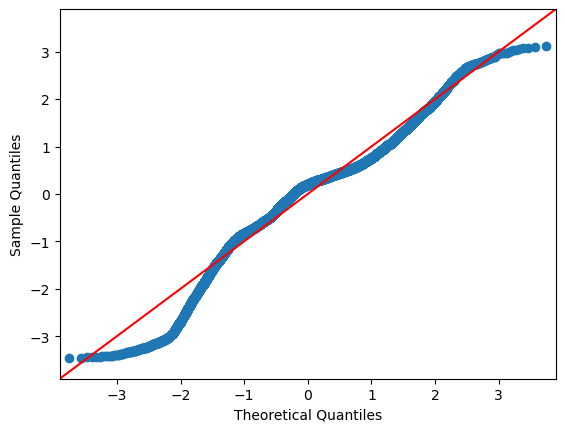

In [125]:
# define residual
res = model.resid
# create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

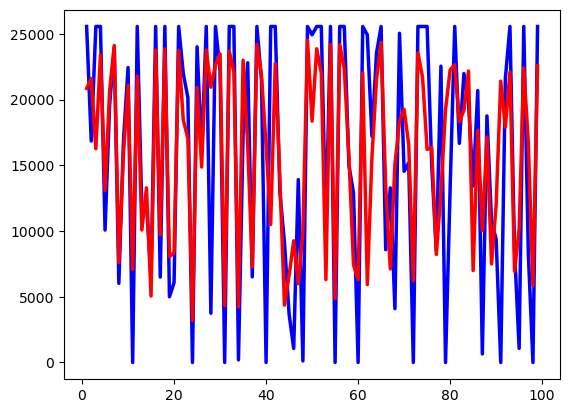

In [126]:
## Not a promising plot .. so let us plot actual and predicted.. Since there are many values let us look at 100 values
cnt=[i for i in range(1,100,1)]
fig = plt.figure()
plt.plot(cnt,Y_test[1:100],color="blue", linewidth=2.5,linestyle="-")
plt.plot(cnt,y_pred[1:100],color="red", linewidth=2.5,linestyle="-")
plt.show()

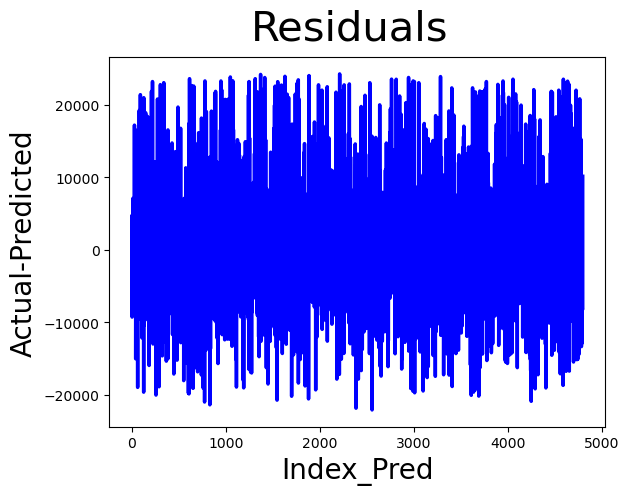

In [127]:
## Plotting the residuals 30% of 15992 = 4797 but take 4799 since dimension vary
cnt = [i for i in range(1,4799,1)]
fig=plt.figure()
plt.plot(cnt,y_pred-Y_test, color = 'blue', linewidth = 2.5, linestyle = '-')
fig.suptitle('Residuals',fontsize = 30)
plt.xlabel('Index_Pred', fontsize = 20)
plt.ylabel('Actual-Predicted', fontsize = 20)
plt.show()


In [128]:
# VIF (Variance Inflation Factor) measures Multi-Collinearity; VIF of > 4 means Multicollinearity exists
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We will calculate VIF for each X variable and store in another df
vif=pd.DataFrame()
vif['VIF FACTOR'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['FEATURES'] = X.columns
vif.round(2)


C:\Users\sagar\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF FACTOR                  FEATURES
0         1.33                       Age
1         1.30             Earnings_1975
2         1.50     Eduacation_HighSchool
3         1.36   Eduacation_Intermediate
4         1.15   Eduacation_PostGraduate
5         1.23       Eduacation_graduate
6          inf             Race_NotBlack
7          inf                Race_black
8          inf          Hisp_NotHispanic
9          inf             Hisp_hispanic
10         inf     MaritalStatus_Married
11         inf  MaritalStatus_NotMarried

## In conclusion, the model has some predictive power, explaining around 46.1% of the variance in the data. The MAE and RMSE values are moderate, indicating that there is still room for improvement in the model's performance.